In [35]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
import pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv("ToyotaCorolla.csv")

In [3]:
print(df.head())

   Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3  ?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ...  Central_Lock  \
0         10      2002  46986    Diesel  90          1  ...             1   
1         10      2002  72937    Diesel  90          1  ...             1   
2          9      2002  41711    Diesel  90          1  ...             0   
3          7      2002  48000    Diesel  90          0  ...             0   
4          3      2002  38500    Diesel  90          0  ...             1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  Doors             1436 non-null   int64 
 13  Cylinders         1436 non-null   int64 
 14  Gears             1436 non-null   int64 
 15  Quarterly_Tax     1436 non-null   int64 
 16  Weight            1436 non-null   int64 
 17  Mfr_Guarantee 

In [5]:
print(df.tail())

        Id                                              Model  Price  \
1431  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1432  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1433  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1434  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1435  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04  Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  ...  \
1431         69         12      1998  20544    Petrol   86          1  ...   
1432         72          9      1998  19000    Petrol   86          0  ...   
1433         71         10      1998  17016    Petrol   86          0  ...   
1434         70         11      1998  16916    Petrol   86          1  ...   
1435         76          5      1998      1    Petrol  110          0  ...   

      Central_Lock  Powered_Windows  Power_Steering  Radio  Mistlamps  \
1431             1       

In [6]:
print(df.describe())

                Id         Price    Age_08_04    Mfg_Month     Mfg_Year  \
count  1436.000000   1436.000000  1436.000000  1436.000000  1436.000000   
mean    721.555014  10730.824513    55.947075     5.548747  1999.625348   
std     416.476890   3626.964585    18.599988     3.354085     1.540722   
min       1.000000   4350.000000     1.000000     1.000000  1998.000000   
25%     361.750000   8450.000000    44.000000     3.000000  1998.000000   
50%     721.500000   9900.000000    61.000000     5.000000  1999.000000   
75%    1081.250000  11950.000000    70.000000     8.000000  2001.000000   
max    1442.000000  32500.000000    80.000000    12.000000  2004.000000   

                  KM           HP    Met_Color    Automatic           cc  ...  \
count    1436.000000  1436.000000  1436.000000  1436.000000   1436.00000  ...   
mean    68533.259749   101.502089     0.674791     0.055710   1576.85585  ...   
std     37506.448872    14.981080     0.468616     0.229441    424.38677  ...   


In [7]:
print(df.isnull().sum())

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64


In [8]:
print(df.isnull().sum().sum())

0


In [9]:
print(df.shape)

(1436, 37)


In [10]:
categorical_columns = ['Fuel_Type', 'Automatic', 'ABS', 'Airbag_1', 'Airco']
df[categorical_columns] = df[categorical_columns].astype('category')


In [11]:
df['age_in_years'] = df['Age_08_04']/12

In [12]:
df['Age_08_04']

0       23
1       23
2       24
3       26
4       30
        ..
1431    69
1432    72
1433    71
1434    70
1435    76
Name: Age_08_04, Length: 1436, dtype: int64

In [13]:
df['age_in_years']

0       1.916667
1       1.916667
2       2.000000
3       2.166667
4       2.500000
          ...   
1431    5.750000
1432    6.000000
1433    5.916667
1434    5.833333
1435    6.333333
Name: age_in_years, Length: 1436, dtype: float64

In [14]:
df['mileage_year'] = df['KM'] / df['age_in_years']

In [15]:
df['mileage_year']

0       24514.434783
1       38054.086957
2       20855.500000
3       22153.846154
4       15400.000000
            ...     
1431     3572.869565
1432     3166.666667
1433     2875.943662
1434     2899.885714
1435        0.157895
Name: mileage_year, Length: 1436, dtype: float64

In [16]:
## Exploraitory Data Analysis

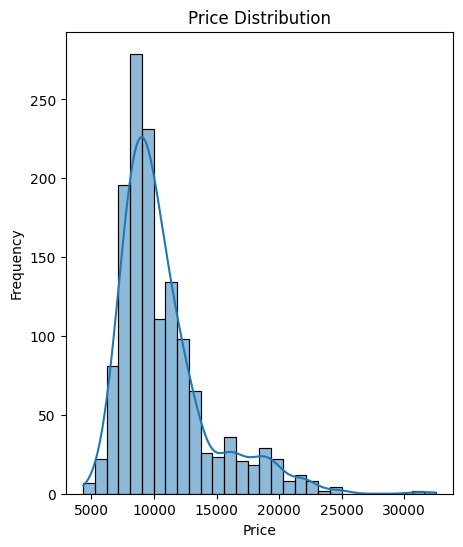

In [17]:
## Price Distribution
plt.figure(figsize=(5, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

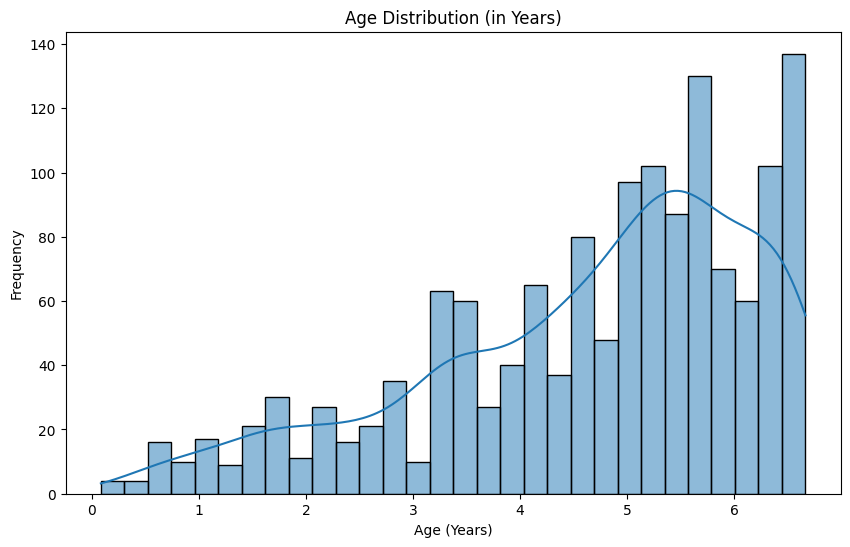

In [18]:
## Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age_in_years'], bins=30, kde=True)
plt.title('Age Distribution (in Years)')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.show()

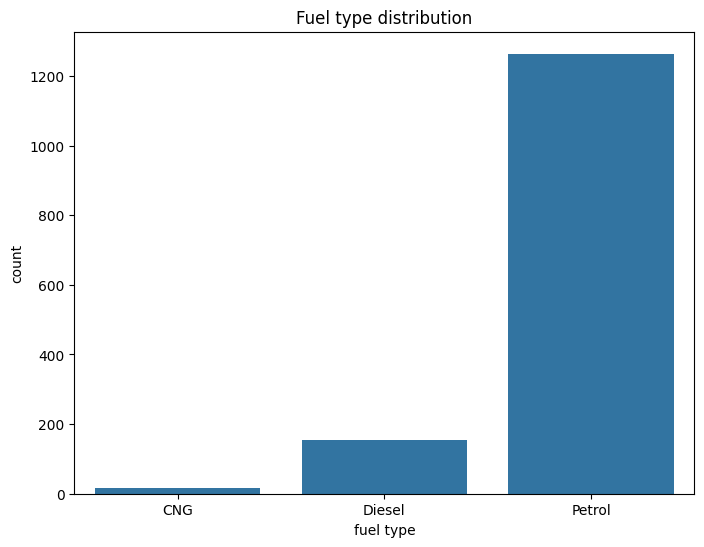

In [19]:
### FUEL DISTRIBUTION
plt.figure(figsize=(8,6))
sns.countplot(x='Fuel_Type',data=df)
plt.title('Fuel type distribution')
plt.xlabel('fuel type')
plt.ylabel('count')
plt.show()


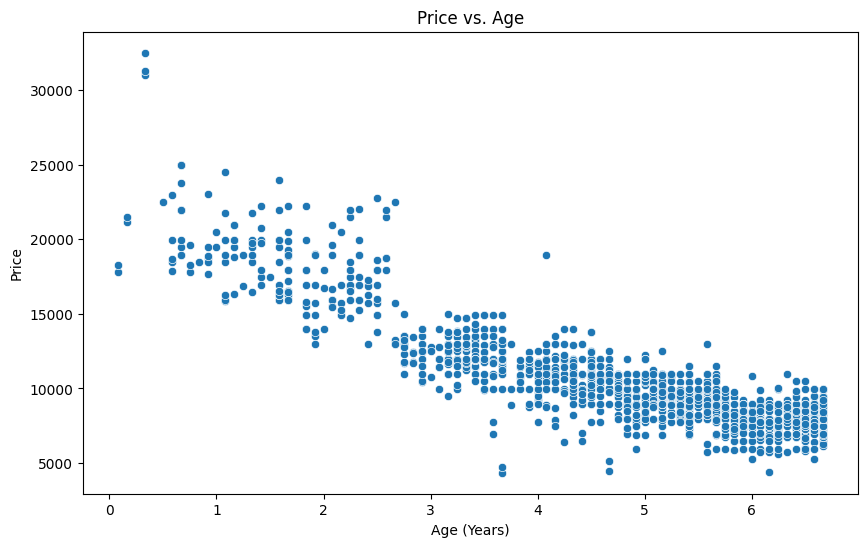

In [20]:
## PRICE VS AGE
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age_in_years', y='Price', data=df)
plt.title('Price vs. Age')
plt.xlabel('Age (Years)')
plt.ylabel('Price')
plt.show()

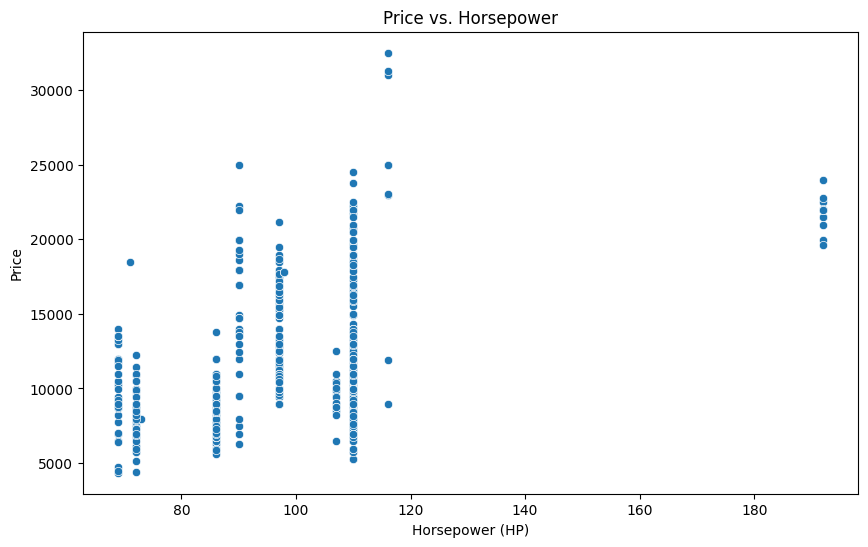

In [21]:
## Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HP', y='Price', data=df)
plt.title('Price vs. Horsepower')
plt.xlabel('Horsepower (HP)')
plt.ylabel('Price')
plt.show()

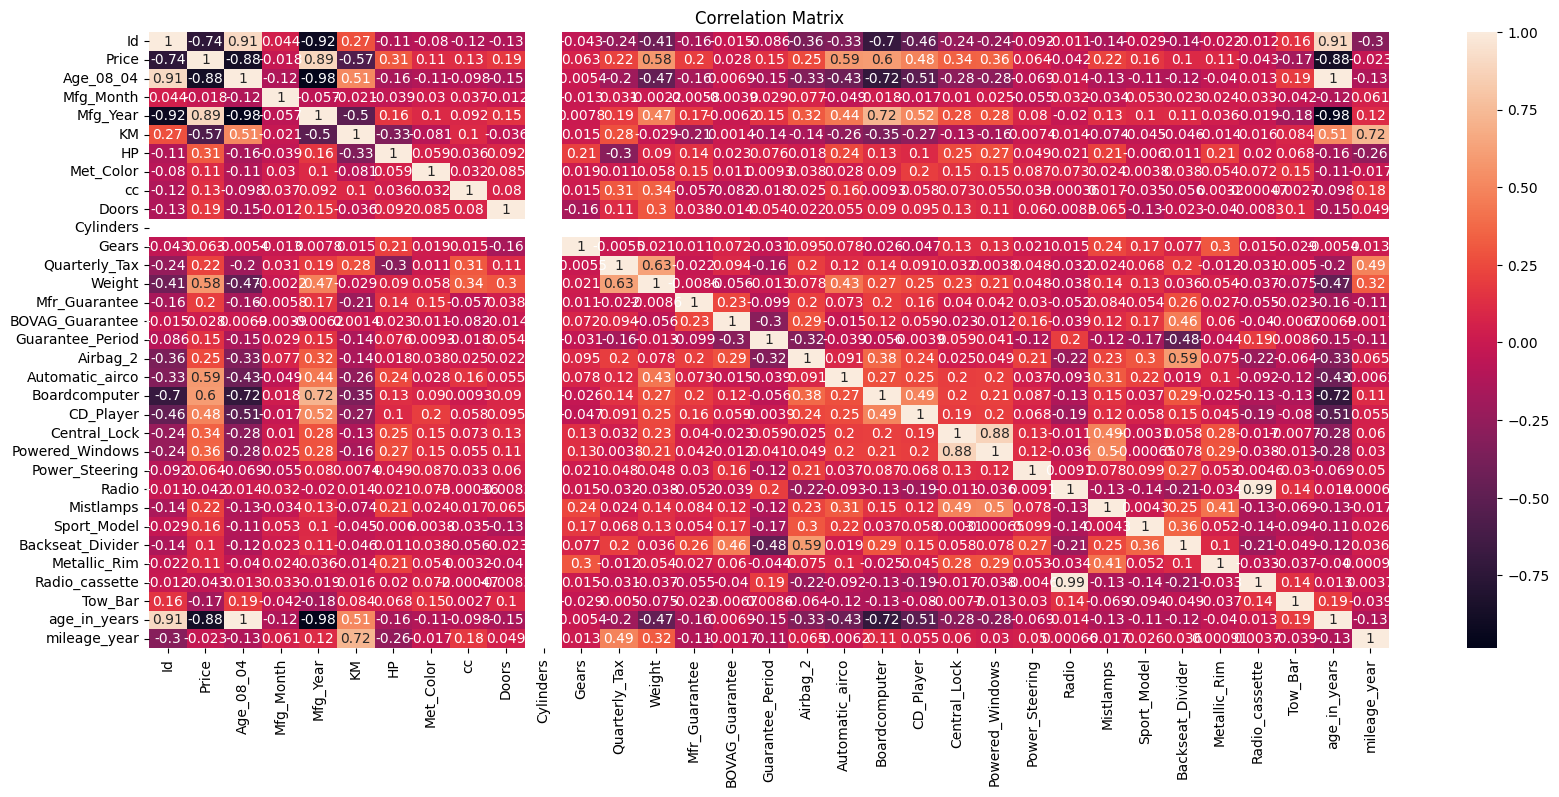

In [22]:
## Correlation (heat map)
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

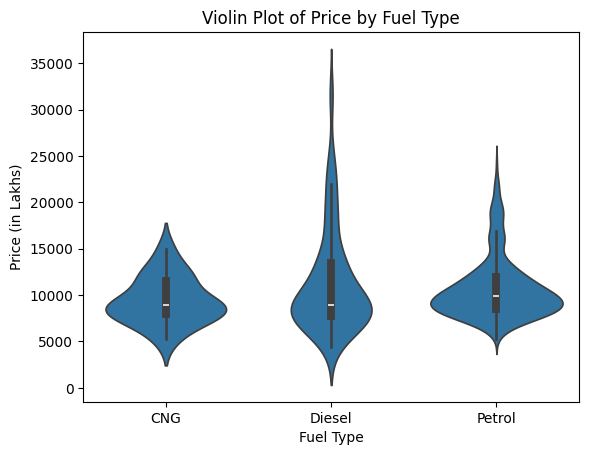

In [25]:
### VIOLIN plot
sns.violinplot(x='Fuel_Type', y='Price', data=df)
plt.title('Violin Plot of Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price (in Lakhs)')
plt.show()

In [51]:
features=['age_in_years','KM','HP','cc','Doors','Weight']
target='Price'

In [52]:
X = df[features]
y = df[target]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [54]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [55]:
y_pred = rf.predict(X_test)

In [56]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1156574.606878125


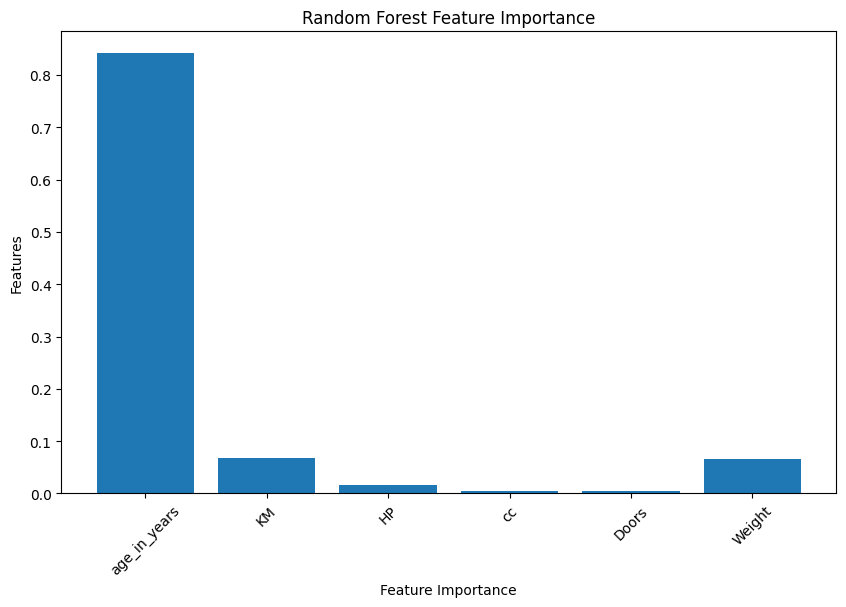

In [62]:
plt.figure(figsize=(10, 6))
plt.bar(features, rf.feature_importances_)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.xticks(rotation=45) 
plt.show()